In [77]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random



In [2]:
### get brent price file from drive and filled it with continous time series
brent_pathname = os.path.join(os.path.sep, 'Users', 'olive', 'Desktop', 'myprojects', 'fuelpredict', 
                              'data', 'Brent_eia.xls')
brent = pd.read_excel(brent_pathname, sheet_name = 'Data 1', skiprows = 2)
brent.set_index('Date', inplace = True)
brent.rename(columns={brent.columns[0]: 'price_USD'}, inplace = True)

# create a continuous date index from 1 Jan 2020 to last date in brent file
date_start = '2020-01-01'
brent_date_idx = pd.date_range(start = date_start, end = brent.index.max())

# fill date index in brent table with continuous date index
brent_filled = brent.reindex(brent_date_idx)
print(brent_filled)
# fill NaN for price with latest know price
brent_filled['price_USD'].fillna(method = 'ffill', inplace = True)
print(brent_filled)


            price_USD
2020-01-01        NaN
2020-01-02      67.05
2020-01-03      69.08
2020-01-04        NaN
2020-01-05        NaN
...               ...
2021-03-25      61.21
2021-03-26      63.77
2021-03-27        NaN
2021-03-28        NaN
2021-03-29      64.06

[454 rows x 1 columns]
            price_USD
2020-01-01        NaN
2020-01-02      67.05
2020-01-03      69.08
2020-01-04      69.08
2020-01-05      69.08
...               ...
2021-03-25      61.21
2021-03-26      63.77
2021-03-27      63.77
2021-03-28      63.77
2021-03-29      64.06

[454 rows x 1 columns]


In [3]:
### get March 2021 fuel file from drive
fuel3_pathname = os.path.join(os.path.sep, 'Users', 'olive', 'Desktop', 'myprojects', 'fuelpredict', 
                              'data', 'FuelWatchRetail-03-2021.csv')
fuel3 = pd.read_csv(fuel3_pathname)
# select only ULP fuel
fuel3 = fuel3[fuel3['PRODUCT_DESCRIPTION'] == 'ULP']
# select only metro station
fuel3 = fuel3[fuel3['REGION_DESCRIPTION'] == 'Metro']
# Sselect three colum : date, station name,  price
fuel3 = fuel3[['PUBLISH_DATE', 'TRADING_NAME', 'PRODUCT_PRICE']]
fuel3.rename(columns = {fuel3.columns[0]: 'date', fuel3.columns[1]:'station_name', fuel3.columns[2]:'ulp_price'}, inplace= True)
pd.set_option('display.max_columns', 5000) 
print(fuel3.head())
print(fuel3.info())


          date            station_name  ulp_price
3   01/03/2021          7-Eleven Ascot      121.9
7   01/03/2021       7-Eleven Balcatta      121.7
11  01/03/2021          7-Eleven Balga      121.9
15  01/03/2021  7-Eleven Banksia Grove      115.9
19  01/03/2021     7-Eleven Bassendean      119.3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12308 entries, 3 to 81221
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          12308 non-null  object 
 1   station_name  12308 non-null  object 
 2   ulp_price     12308 non-null  float64
dtypes: float64(1), object(2)
memory usage: 384.6+ KB
None


In [4]:
#select one station
fuel3_osborne = fuel3[fuel3['station_name'] == 'Puma Osborne Park']
fuel3_osborne.reset_index(inplace = True, drop = True)
print(fuel3_osborne)


          date       station_name  ulp_price
0   01/03/2021  Puma Osborne Park      121.7
1   02/03/2021  Puma Osborne Park      119.7
2   03/03/2021  Puma Osborne Park      149.7
3   04/03/2021  Puma Osborne Park      139.7
4   05/03/2021  Puma Osborne Park      139.7
5   06/03/2021  Puma Osborne Park      133.7
6   07/03/2021  Puma Osborne Park      127.7
7   08/03/2021  Puma Osborne Park      121.7
8   09/03/2021  Puma Osborne Park      120.7
9   10/03/2021  Puma Osborne Park      149.7
10  11/03/2021  Puma Osborne Park      145.7
11  12/03/2021  Puma Osborne Park      145.7
12  13/03/2021  Puma Osborne Park      133.7
13  14/03/2021  Puma Osborne Park      127.7
14  15/03/2021  Puma Osborne Park      125.7
15  16/03/2021  Puma Osborne Park      123.7
16  17/03/2021  Puma Osborne Park      149.7
17  18/03/2021  Puma Osborne Park      149.7
18  19/03/2021  Puma Osborne Park      147.7
19  20/03/2021  Puma Osborne Park      137.7
20  21/03/2021  Puma Osborne Park      129.7
21  22/03/

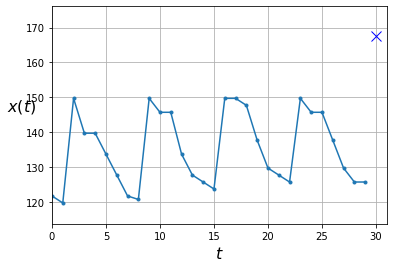

In [5]:
def plot_series1(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    y_all = series.append(y).append(y_pred)
    y_max = y_all.max()
    y_min = y_all.min(0)
    plt.axis([0, n_steps + 1, y_min*.95, y_max*1.05])

ulp_col_index = fuel3_osborne.columns.get_loc('ulp_price')
n_steps = len(fuel3_osborne.iloc[:-1,ulp_col_index])
plot_series1(fuel3_osborne.iloc[:-1,ulp_col_index], fuel3_osborne.iloc[-1:,ulp_col_index],
                            y_label=("$x(t)$")) # if col==0 else None))
# save_fig("time_series_plot")
plt.draw()

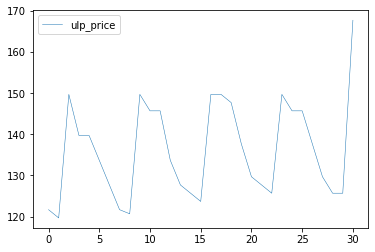

In [20]:
fuel3_osborne.plot(linewidth=0.5)

In [6]:
### get Feb 2021 fuel file from drive
fuel2_pathname = os.path.join(os.path.sep, 'Users', 'olive', 'Desktop', 'myprojects', 'fuelpredict', 
                              'data', 'FuelWatchRetail-02-2021.csv')
fuel2 = pd.read_csv(fuel2_pathname)
# select only ULP fuel
fuel2 = fuel2[fuel2['PRODUCT_DESCRIPTION'] == 'ULP']
# select only metro station
fuel2 = fuel2[fuel2['REGION_DESCRIPTION'] == 'Metro']
# Select three colum : date, station name,  price
fuel2 = fuel2[['PUBLISH_DATE', 'TRADING_NAME', 'PRODUCT_PRICE']]
fuel2.rename(columns = {fuel2.columns[0]: 'date', fuel2.columns[1]:'station_name', fuel2.columns[2]:'ulp_price'}, inplace= True)
print(fuel2.head())
print(fuel2.info())

          date            station_name  ulp_price
3   01/02/2021          7-Eleven Ascot      112.9
7   01/02/2021       7-Eleven Balcatta      113.7
11  01/02/2021          7-Eleven Balga      113.9
15  01/02/2021  7-Eleven Banksia Grove      109.9
19  01/02/2021     7-Eleven Bassendean      113.9
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11080 entries, 3 to 73470
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          11080 non-null  object 
 1   station_name  11080 non-null  object 
 2   ulp_price     11080 non-null  float64
dtypes: float64(1), object(2)
memory usage: 346.2+ KB
None


In [7]:
### get Jan 2021 fuel file from drive
fuel1_pathname = os.path.join(os.path.sep, 'Users', 'olive', 'Desktop', 'myprojects', 'fuelpredict', 
                              'data', 'FuelWatchRetail-01-2021.csv')
fuel1 = pd.read_csv(fuel1_pathname)
# select only ULP fuel
fuel1 = fuel1[fuel1['PRODUCT_DESCRIPTION'] == 'ULP']
# select only metro station
fuel1 = fuel1[fuel1['REGION_DESCRIPTION'] == 'Metro']
# Select three colum : date, station name,  price
fuel1 = fuel1[['PUBLISH_DATE', 'TRADING_NAME', 'PRODUCT_PRICE']]
fuel1.rename(columns = {fuel1.columns[0]: 'date', fuel1.columns[1]:'station_name', fuel1.columns[2]:'ulp_price'}, inplace= True)
print(fuel1.head())
print(fuel1.info())

          date            station_name  ulp_price
3   01/01/2021          7-Eleven Ascot      127.9
7   01/01/2021       7-Eleven Balcatta      127.7
11  01/01/2021          7-Eleven Balga      127.9
15  01/01/2021  7-Eleven Banksia Grove      127.9
19  01/01/2021     7-Eleven Bassendean      127.9
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11881 entries, 3 to 78809
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          11881 non-null  object 
 1   station_name  11881 non-null  object 
 2   ulp_price     11881 non-null  float64
dtypes: float64(1), object(2)
memory usage: 371.3+ KB
None


In [8]:
#select one station
fuel1_balcatta = fuel1[fuel1['station_name'] == '7-Eleven Balcatta']
fuel1_balcatta.reset_index(inplace = True, drop = True)
print(fuel1_balcatta)


          date       station_name  ulp_price
0   01/01/2021  7-Eleven Balcatta      127.7
1   02/01/2021  7-Eleven Balcatta      115.7
2   03/01/2021  7-Eleven Balcatta      111.9
3   04/01/2021  7-Eleven Balcatta      107.7
4   05/01/2021  7-Eleven Balcatta      105.7
5   06/01/2021  7-Eleven Balcatta      141.9
6   07/01/2021  7-Eleven Balcatta      137.7
7   08/01/2021  7-Eleven Balcatta      127.7
8   09/01/2021  7-Eleven Balcatta      117.7
9   10/01/2021  7-Eleven Balcatta      112.7
10  11/01/2021  7-Eleven Balcatta      107.7
11  12/01/2021  7-Eleven Balcatta      105.7
12  13/01/2021  7-Eleven Balcatta      149.9
13  14/01/2021  7-Eleven Balcatta      139.7
14  15/01/2021  7-Eleven Balcatta      129.7
15  16/01/2021  7-Eleven Balcatta      119.7
16  17/01/2021  7-Eleven Balcatta      111.7
17  18/01/2021  7-Eleven Balcatta      109.7
18  19/01/2021  7-Eleven Balcatta      107.7
19  20/01/2021  7-Eleven Balcatta      152.9
20  21/01/2021  7-Eleven Balcatta      139.7
21  22/01/

In [9]:
### Append Jan, Feb and March 2021 based on station in March 2021

fuel = fuel3.append(fuel2).append(fuel1)
fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35269 entries, 3 to 78809
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          35269 non-null  object 
 1   station_name  35269 non-null  object 
 2   ulp_price     35269 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [10]:
fuel[fuel['station_name'] == 'Puma Osborne Park']
fuel['date'] = pd.to_datetime(fuel['date'], format='%d/%m/%Y')
fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35269 entries, 3 to 78809
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          35269 non-null  datetime64[ns]
 1   station_name  35269 non-null  object        
 2   ulp_price     35269 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.1+ MB


In [11]:
#select one station
fuel_wesco = fuel[fuel['station_name'] == 'Wesco North Perth']
fuel_wesco.reset_index(inplace = True, drop = True)
pd.set_option('display.max_rows', 500)
print(fuel_wesco)
pd.set_option('display.max_rows', 10)


         date       station_name  ulp_price
0  2021-03-01  Wesco North Perth      142.0
1  2021-03-02  Wesco North Perth      142.0
2  2021-03-03  Wesco North Perth      142.0
3  2021-03-04  Wesco North Perth      142.0
4  2021-03-05  Wesco North Perth      142.0
5  2021-03-06  Wesco North Perth      142.0
6  2021-03-07  Wesco North Perth      142.0
7  2021-03-08  Wesco North Perth      142.0
8  2021-03-09  Wesco North Perth      142.0
9  2021-03-10  Wesco North Perth      142.0
10 2021-03-11  Wesco North Perth      142.0
11 2021-03-12  Wesco North Perth      142.0
12 2021-03-13  Wesco North Perth      142.0
13 2021-03-14  Wesco North Perth      142.0
14 2021-03-15  Wesco North Perth      142.0
15 2021-03-16  Wesco North Perth      142.0
16 2021-03-17  Wesco North Perth      142.0
17 2021-03-18  Wesco North Perth      142.0
18 2021-03-19  Wesco North Perth      142.0
19 2021-03-20  Wesco North Perth      142.0
20 2021-03-21  Wesco North Perth      142.0
21 2021-03-22  Wesco North Perth

<AxesSubplot:>

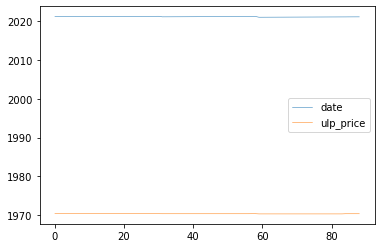

In [22]:
fuel_wesco.plot(linewidth=0.5)

In [12]:
fuel.sort_values(by=['station_name','date'], ignore_index=True, inplace=True)
fuel

,date,station_name,ulp_price
0,2021-01-01,7-Eleven Ascot,127.9
1,2021-01-02,7-Eleven Ascot,117.9
2,2021-01-03,7-Eleven Ascot,111.9
3,2021-01-04,7-Eleven Ascot,107.9
4,2021-01-05,7-Eleven Ascot,104.9
...,...,...,...
35264,2021-03-27,Wesco North Perth,142.0
35265,2021-03-28,Wesco North Perth,142.0
35266,2021-03-29,Wesco North Perth,142.0
35267,2021-03-30,Wesco North Perth,142.0


In [13]:
fuel['station_name'].unique()
fuel['station_name'].value_counts()


Caltex StarMart Mundaring               89
7-Eleven Malaga                         89
Caltex Woolworths Osborne Park          89
Caltex StarMart Applecross              89
BP Baldivis Southbound Travel Centre    89
                                        ..
Vibe Piara Waters                       14
Ampol Foodary Karrinyup                 10
Ampol Foodary Ashby                      6
Ampol Foodary Stratton                   6
BP Ellenbrook                            2
Name: station_name, Length: 415, dtype: int64

<AxesSubplot:>

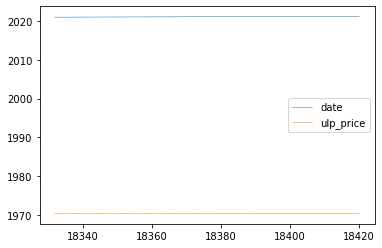

In [24]:
fuel_CWOP = fuel[fuel['station_name'] == 'Caltex Woolworths Osborne Park']
fuel_CWOP.plot(linewidth=0.5)

In [37]:
fuel_CWOP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 18332 to 18420
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          89 non-null     datetime64[ns]
 1   station_name  89 non-null     object        
 2   ulp_price     89 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.3+ KB


<AxesSubplot:title={'center':'Caltex Woolworths Osborne Park'}, xlabel='date'>

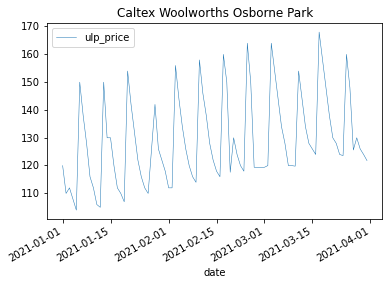

In [36]:
fuel_CWOP.plot(x='date', y='ulp_price', linewidth=0.5, title = fuel_CWOP['station_name'].iloc[0] )

In [79]:
# NOT USED - randidx is a list
name_list = fuel['station_name'].unique()
randidx = []
for i in range(10):
    randidx.append(random.randint(0,len(name_list)))

for i in randidx:
    print(i)

279
407
14
120
47
82
75
367
46
328


In [75]:
# NOT USED - randidx is a dictionary
name_list = fuel['station_name'].unique()
len(name_list)
randidx = {}
for i in range(10):
    key = random.randint(0,len(name_list))
    value = name_list[key]
    randidx[key] = value

print(randidx)

{19: '7-Eleven Kelmscott Central', 9: '7-Eleven Canning Vale', 24: '7-Eleven Middle Swan', 343: 'Puma North Perth', 382: 'United Myaree', 347: 'Puma Phoenix', 182: 'Caltex StarShop Wangara', 413: 'Vibe Yangebup', 88: 'BP Dog Swamp', 133: 'Caltex StarMart Altone Road'}


In [87]:
# NOT USED - randidx is an array
name_list = fuel['station_name'].unique()
randidx = []
for i in range(10):
    indice = random.randint(0,len(name_list))
    randidx.append([indice, name_list[indice]])
print(randidx)

[[246, 'Coles Express Fremantle'], [402, 'Vibe Morley'], [186, 'Caltex The Foodary Baldivis'], [25, '7-Eleven Midland'], [225, 'Coles Express Armadale'], [258, 'Coles Express Middle Swan'], [216, 'Caltex Woolworths Osborne Park'], [195, 'Caltex Welshpool'], [105, 'BP Maida Vale'], [296, 'Mundijong Store & Deli']]


In [90]:
randidx[1][1]

'Vibe Morley'

In [93]:
for x in randidx:
    print(x)
    print(x[0])
    print(x[1])

[246, 'Coles Express Fremantle']
246
Coles Express Fremantle
[402, 'Vibe Morley']
402
Vibe Morley
[186, 'Caltex The Foodary Baldivis']
186
Caltex The Foodary Baldivis
[25, '7-Eleven Midland']
25
7-Eleven Midland
[225, 'Coles Express Armadale']
225
Coles Express Armadale
[258, 'Coles Express Middle Swan']
258
Coles Express Middle Swan
[216, 'Caltex Woolworths Osborne Park']
216
Caltex Woolworths Osborne Park
[195, 'Caltex Welshpool']
195
Caltex Welshpool
[105, 'BP Maida Vale']
105
BP Maida Vale
[296, 'Mundijong Store & Deli']
296
Mundijong Store & Deli


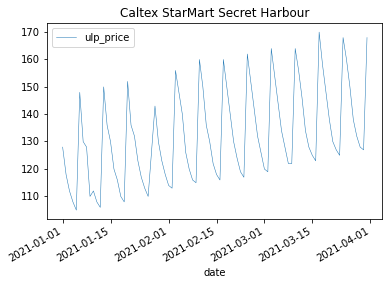

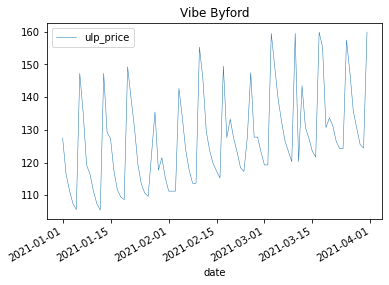

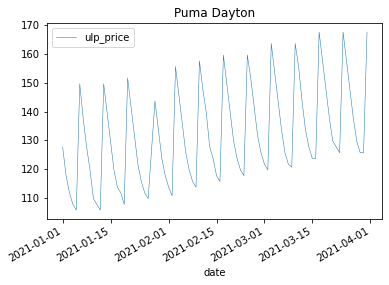

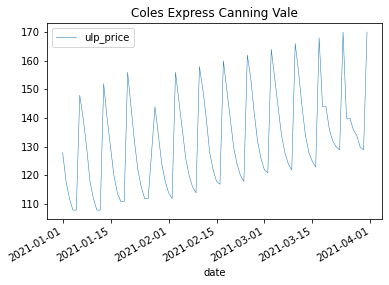

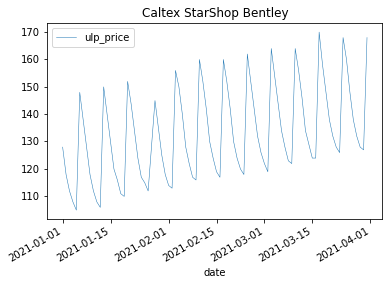

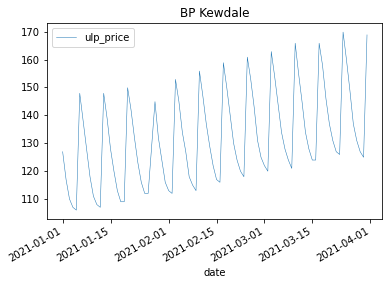

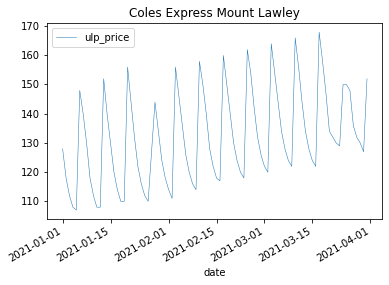

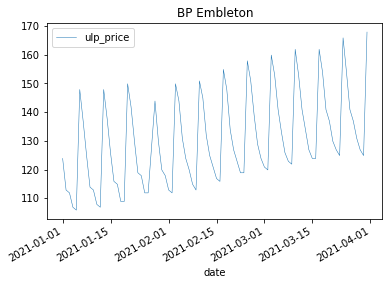

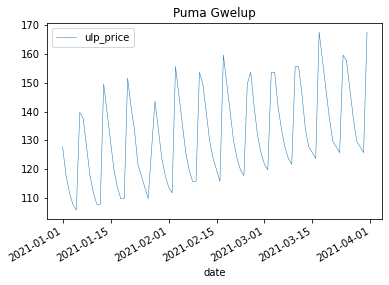

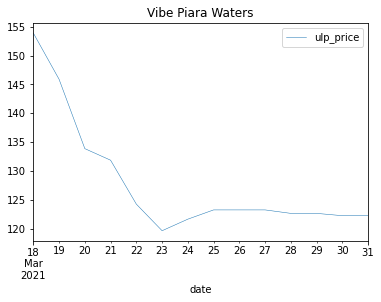

In [96]:
name_list = fuel['station_name'].unique()
randidx = []
for i in range(10):
    indice = random.randint(0,len(name_list))
    randidx.append([indice, name_list[indice]])
for i in randidx:
    fuelnew = fuel[fuel['station_name'] == i[1]]
    fuelnew.plot(x='date', y='ulp_price', linewidth=0.5, title = fuelnew['station_name'].iloc[0])


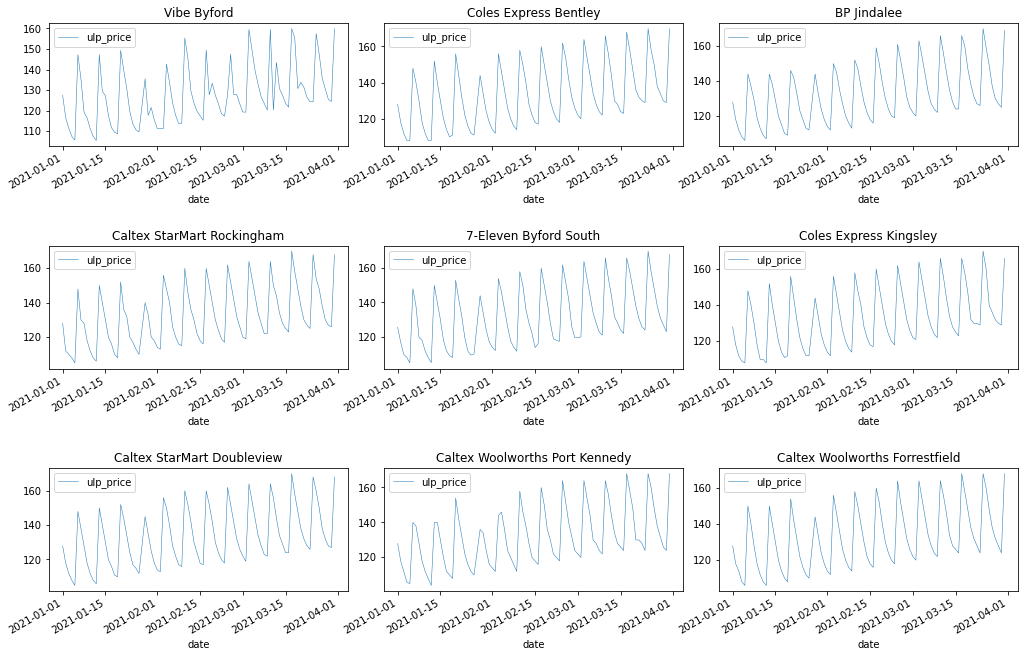

In [134]:
name_list = fuel['station_name'].unique()
randidx = []
for i in range(9):
    indice = random.randint(0,len(name_list))
    randidx.append([i, indice, name_list[indice]])
    
#create subplot figure with having 3 side by side plots
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(14,10))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=10.0)
# unpack all the axes subplots
axe = axes.ravel()

for i in randidx:
    fuelnew = fuel[fuel['station_name'] == i[2]]
    fuelnew.plot(x='date', y='ulp_price', linewidth=0.5, title = fuelnew['station_name'].iloc[0], ax =axe[i[0]])

        

In [14]:
# Convert the DataFrame to a NumPy array
# fuel = fuel.to_numpy()

In [15]:
# fuel

In [16]:
# fuel.shape

In [17]:
grouped = fuel.groupby(['station_name'])
grouped

In [18]:
l_grouped = list(grouped)
l_grouped

[('7-Eleven Ascot',
           date    station_name  ulp_price
  0  2021-01-01  7-Eleven Ascot      127.9
  1  2021-01-02  7-Eleven Ascot      117.9
  2  2021-01-03  7-Eleven Ascot      111.9
  3  2021-01-04  7-Eleven Ascot      107.9
  4  2021-01-05  7-Eleven Ascot      104.9
  ..        ...             ...        ...
  84 2021-03-27  7-Eleven Ascot      137.9
  85 2021-03-28  7-Eleven Ascot      131.9
  86 2021-03-29  7-Eleven Ascot      126.9
  87 2021-03-30  7-Eleven Ascot      122.9
  88 2021-03-31  7-Eleven Ascot      167.9
  
  [89 rows x 3 columns]),
 ('7-Eleven Balcatta',
            date       station_name  ulp_price
  89  2021-01-01  7-Eleven Balcatta      127.7
  90  2021-01-02  7-Eleven Balcatta      115.7
  91  2021-01-03  7-Eleven Balcatta      111.9
  92  2021-01-04  7-Eleven Balcatta      107.7
  93  2021-01-05  7-Eleven Balcatta      105.7
  ..         ...                ...        ...
  173 2021-03-27  7-Eleven Balcatta      137.7
  174 2021-03-28  7-Eleven Balcatta 

In [19]:
type(l_grouped)

list